In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import pi, sin, cos, dot, tensordot
from numpy.linalg import multi_dot

In [3]:
class TF:
    def __init__(self, n, d):
        self.index = n
        self.thickness = d
        
    def matrix(self, w):
        delta = 2*pi*(self.index)*(self.thickness)/w
        ita = self.index
        element = pd.DataFrame(
            {'e1':cos(delta), 'e2':1j/ita*sin(delta), 'e3':1j*ita*sin(delta), 'e4':cos(delta)}
        )
        matrix = np.reshape(element.values.reshape(1,-1), (np.size(w), 2, 2))
        return matrix
    

In [4]:
def Eq_dl(layer_2, layer_1, ns):
    eq = dot(
        [dot(layer_2[i], layer_1[i]) for i in range(np.size(target_w))],
        np.array([[1], [ns]]))
    d, _, _ = np.shape(eq)
    y = pd.DataFrame(np.reshape(eq, (d, 2)), columns = ['B','C'])
    Y = y['C']/y['B']
    return Y.values.reshape(d, 1)
    
def R(Eq, n0):
    r = (1-Eq)/(1+Eq)
    R = np.reshape(r*r.conjugate(), np.size(Eq))
    return np.real(R)

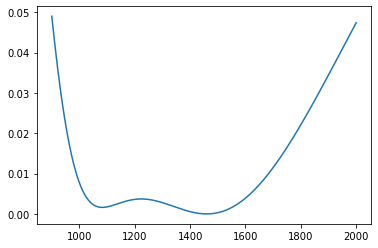

0.1990058422088623


In [5]:
time_s = time.time()
target_w = np.linspace(900,2000, 1000)
layer1 = TF(2.1, 288.67).matrix(target_w)
layer2 = TF(1.42, 223.67).matrix(target_w)
substrate = 1.8
Y = Eq_dl(layer2, layer1, substrate)
RRR = R(Y, 1)
plt.plot(target_w, RRR)
plt.show()
time_e = time.time()
print(time_e-time_s)

cost = 1.47147798787406e-06


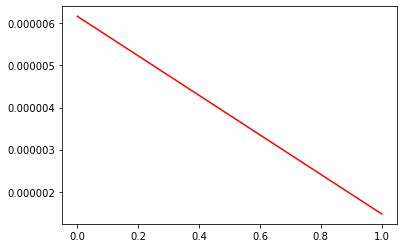

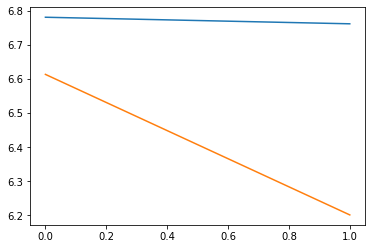

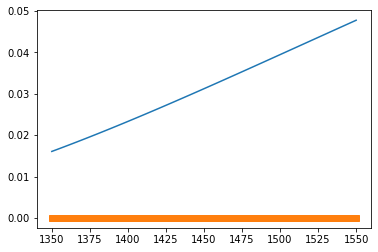

219.5039203860285 175.3392617061948


In [48]:
def barrier(x):
    b = np.log(500-x)*np.log(x-75)
    if b == False:
        return 0
    else:
        return b**4/10
# parameter
target_w = np.linspace(1350,1550, 100)
target_R = np.zeros(np.size(target_w))
substrate = 1.8
m = np.size(target_w)
# initial value
d1 = 300
d2 = 250
layer1 = TF(2.1, d1).matrix(target_w)
layer2 = TF(1.42, d2).matrix(target_w)
# iteration
testi = []
testj = []
a1 = []
a2 = []
pre_J = np.inf
for i in range(1000):
    # learning rate
    alpha1 = 0.0001*barrier(d1)
    alpha2 = 0.0001*barrier(d2)
    # gradient descent
    hofx = R(Eq_dl(layer2, layer1, substrate), 1)
    Grad_J = 1/m*sum((hofx-target_R)*target_w.T)
    d1 = d1 - alpha1* Grad_J
    d2 = d2 - alpha2* Grad_J
    # update layer
    layer1 = TF(2.1, d1).matrix(target_w)
    layer2 = TF(1.42, d2).matrix(target_w)
    # cost function
    J = 1/(2*m)*sum((hofx-target_R)**2)
    new_J = J
    if new_J > pre_J:
        break
    testi.append(i)
    testj.append(J)
    a1.append(alpha1)
    a2.append(alpha2)
    pre_J = new_J

plt.plot(testi, testj, 'r')
print('cost =', testj[-1])
plt.show()
plt.plot(testi, a1, testi, a2)
plt.show()
plt.plot(target_w, (R(Eq_dl(layer2, layer1, substrate), 1)))
plt.plot(target_w, target_R, '-s')
plt.show()
print(d1, d2)